### Заметки:

#### Нам

- Попросить у лектора примеры значений всех выдаваемых величин и результатов (хотя бы по порядку величины)

- N_d, N_d0 ??? (относительно семинара)

- В чем измеряется диэлектрическая проницаемость?

- Почему электрическое поле измеряется (на слайде) в $e/cm^2$ ???

Должно вообще в $$ В/м = (10^6 c^{-1}) \frac{дин}{статК} = (10^6 c^{-1}) \cdot \frac{дин}{дин^{1/2} \cdot см} = 10^6 \cdot \frac{1}{3} \cdot 10^{-10} \cdot \frac{г^{1/2}}{с \cdot см^{1/2}} = \\ =3.3 \cdot 10^{-5} \cdot \frac{г^{1/2}}{с \cdot см^{1/2}}$$

$$[e] = [статК] = [дин^{1/2}\cdot см] = [\frac{г^{1/2}см^{3/2}}{с }]$$

тогда 

$$[\frac{E_{out}}{4 \pi e}] = [\frac{г^{1/2}}{с \cdot см^{1/2}} \cdot \frac{с}{г^{1/2}см^{3/2}}] = [\frac{1}{см^2}]$$

- Почему на слайде $N_{as}$ дано в $\frac{1}{см^3}$ (должно быть в $\frac{1}{см^2}$)

#### В fompy

- Почему нет спиновой двойки в выражении для Nd+ (В семинаре есть) 

In [185]:
import math
from fompy import constants
from fompy import functions
from fompy import materials
from fompy import models
from fompy import units
from fompy import util

import matplotlib.pyplot as plt

Входные данные

Cо слайда:

In [225]:
#условия
T = 300 #Температура, K
E_out = 10*1e12 #Внешнее поле, e/cm^2

#полупроводник
E_gap = 1.12 * constants.eV #Между валентной зоной и зоной проводимости, эрг
epsilon = 12 #диэлекрическая проницаемость
m_h = 0.6 * constants.me #эффективаная масса дырок, г
m_e = 0.98 * constants.me #эффективная масса электронов, г

#легирование (доноры)
E_d = 50*1e-3 * constants.eV #положение уровня донора (от дна зоны проводимости!)
#а в fompy подставлять E_gap - E_d : отсчет от потолка валентной зоны
N_d0 = 1e17 #концентрация доноров cm^-3

E_d_fp = E_gap - E_d

#поверхностные акцепторы
N_as = (1.5*1e15) #плотность поверхностных акцепторов cm^-2 (должна быть)
E_as = 0.96 * constants.eV #их положение уровня энергии

Попытка найти нормальные: 
(арсенид галлия)

"Например, для арсенида галлия с изгибом зон, равным 0,2 эВ, при концентрации доноров $10^{10}см^{-3}$ размер ОПЗ составляет 170 микрон (что сравнимо с толщиной рабочих подложек – 300–400 микрон. Для концентрации доноров $10^{20}см^{–3}$размер ОПЗ составляет уже 17 ангстрем (всего три – четыре монослоя!)."

In [244]:
T = 300 #Температура, K
E_out = 0 #Внешнее поле, e/cm^2 ???????

pure_scond = materials.GaAs

#полупроводник
E_gap = pure_scond.Eg #Между валентной зоной и зоной проводимости, эрг
epsilon = pure_scond.eps #диэлекрическая проницаемость
m_h = pure_scond.mh #эффективаная масса дырок, г
m_e = pure_scond.me #эффективная масса электронов, г

#легирование (доноры)
E_d = 10*1e-3 * constants.eV #положение уровня донора (от дна зоны проводимости!)
#а в fompy подставлять E_gap - E_d : отсчет от потолка валентной зоны
N_d0 = 1e10 #концентрация доноров cm^-3

E_d_fp = E_gap - E_d

#поверхностные акцепторы
N_as = (1.5*1e15)**(2/3) #плотность поверхностных акцепторов cm^-2
E_as = 0.96 * constants.eV #их положение уровня энергии

Создаю наш полупроводник

In [245]:
#pure_scond = models.Semiconductor(m_e, m_h, E_gap, chi=None, eps=epsilon)
doped = models.DopedSemiconductor(mat=pure_scond, Na=0, Ea=0, Nd=N_d0, Ed=E_d_fp)


In [246]:
doped.Eg/constants.eV

1.424

1. Сначала находим эффективную плотность состояний для электронов и дырок


Формула лектора: 

$$N_{C(V)} = 2.51\cdot 10^{18} (\frac{m_{C(V)}}{m_0})^{3/2} (\frac{T}{300})^{3/2} \cdot cm^{-3}$$

Формула fompy:

$$N_{C(V)} = 2 \left( \frac{2 \pi m_{C(V)} k T }{ (2 \pi \hbar)^2 } \right)^{3/2} \cdot cm^{-3}$$


*Сходится по обеим формулам*

In [247]:
N_c = doped.Nc(T) #cm^-3
N_v = doped.Nv(T) #cm^-3
N_c, N_v

(3.964533495514421e+17, 9.673754722651005e+18)

2. Находим положение уровня Ферми в квазинейтральном объеме из условия электронейтральности. Формулы лектора:
$$N_d^+ + p = n$$

$$n = N_c \cdot e^{\frac{E_f - E_g}{kT}}$$
$$p = N_v \cdot e^{\frac{-E_f}{kT}}$$

$$N_d^+ = N_{d0} \frac{1}{1 + e^{\frac{E_g - E_d - E_f}{kT}}}$$

Формулы fompy:

$$N_d^+ = N_d \cdot (1 - f(E_d))$$

$$n = N_c(T) \Phi_{1/2}\left( \frac{ E_f - E_g }{ k T } \right)$$

$$n_p = N_v(T) \Phi_{1/2}\left( \frac{ - E_f }{ k T } \right)$$

$$p + N_d^{+} - n - N_a^{-} = 0$$

$$f(E) = \frac{ 1 }{ 1 + \exp\left( \frac{ E - E_f }{ k T } \right)}$$

**Уровень Ферми в квазинейтральном объеме:**

In [248]:
E_f = doped.fermi_level(T)
E_f/constants.eV

0.974666519165039

Пока не ввели параметры примеси, совпадает со значением для чистого:

In [249]:
pure_scond.fermi_level(T)/constants.eV

0.7533099822998045

### Решение уравнения на изгиб зон

Уравнение на $\phi_s$ без внешнего поля: заряд поверхностных акцепторов равен заряду ОПЗ: 

$$ N_{d0}We = N^+_{as}e\\
\sqrt{\frac{\epsilon \phi_s N_{d0}}{2\pi e^2}} = N_{as}\frac{1}{1 + e^{\frac{E_{as}+\phi_s - E_f}{kT}}} = [\frac{1}{cm^2}]$$

In [250]:
# x == phi_s в эВ !!!!
def f_left(x):
    x_erg = x * constants.eV
    return math.sqrt(epsilon * x_erg * N_d0/(2*math.pi*(constants.e)**2))

def f_right(x):
    x_erg = x * constants.eV
    return N_as*(1/(1 + math.exp((E_as + x_erg - E_f)/(constants.k*T))))

def f(x):
    return f_left(x) - f_right(x)

In [260]:
x_s = [i*0.01 for i in range(0, 101, 1)]
left = [f_left(x) for x in x_s]
right = [f_right(x) for x in x_s]
f_s = [f_left(x) - f_right(x) for x in x_s]

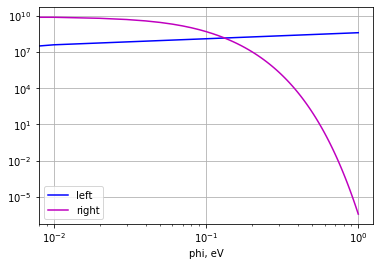

In [261]:
plt.plot(x_s, left, 'b', label="left")
plt.plot(x_s, right, 'm', label="right")
plt.grid()
plt.xlabel('phi, eV')
#plt.title('Решения u(t), v(t)')
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

In [262]:
from scipy.optimize import fsolve
x_0 = 0.01
root = fsolve(f,x_0)
root

array([0.1322772])

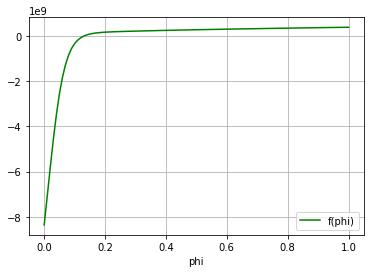

In [263]:
plt.plot(x_s, f_s, 'g', label="f(phi)")
plt.grid()
plt.xlabel('phi')
#plt.xscale("log")
#plt.yscale("log")
plt.legend()
plt.show()

In [255]:
def W(phi):
    #phi в эВ
    phi_erg = phi * constants.eV
    return math.sqrt(epsilon*phi_erg/(N_d0*2*math.pi*(constants.e)**2))

In [256]:
print('Изгиб зон', root[0], 'эВ')
print('ОПЗ', W(root[0])*1e4, 'микрон')

Изгиб зон 0.132277200362641 эВ
ОПЗ 137.330211045258 микрон


**Попытки нарисовать диаграмму:** 

In [265]:
def make_points(phi, W):
    N = 
    x_s = []
    E_f_points = 

SyntaxError: unexpected EOF while parsing (<ipython-input-265-ca54c34c067e>, line 1)

--------

*Настино решение:*

In [10]:
C1 = math.sqrt((epsilon*N_d0)/ (2*math.pi*constants.e**2)) 
print(C1)
C2 = E_out / (4*math.pi*constants.e)
print(C2)
print(N_as)
C0 = constants.k*T
print("C0",C0)
C3 = (E_as - E_f)/C0
print(math.exp((C3 + 1*constants.eV/C0)))
print(N_as/(1 + math.exp(C3 + 1*constants.eV/C0)))

9.098883452776008e+17
1.6568284727451108e+21
13103706971.044466
C0 4.143e-14
2.8341025231055508e+16
4.6235825501067954e-07


In [11]:
def f1(x):
    C1 = sqrt((epsilon*N_d0)/ (2*math.pi*constants.e**2)) 
    return C1*sqrt(x)

In [13]:
def f2(x):
    C0 = constants.k*T
    #C2 = E_out / (4*pi*e)
    C2 = 0
    C3 = (E_as - E_f)/C0
    return N_as/(1 + math.exp(C3 + x/C0)) + C2

In [16]:
def f(x):
    C0 = constants.k*T
    C1 = math.sqrt((epsilon*N_d0)/ (2*math.pi*constants.e**2)) 
    C2 = E_out / (4*math.pi*constants.e)
    C3 = (E_as - E_f)/C0
    return C1*math.sqrt(x) - N_as/(1 + math.exp(C3 + x/C0)) - C2

In [17]:
from scipy.optimize import fsolve
x0 = 1.5 * constants.eV
root = fsolve(f,x0)
root
print(root / constants.eV, 'eV')

OverflowError: math range error